## **CNN with MNIST Data**

In [1]:
import pandas as pd
import seaborn as sns
import tensorflow as tf                       
import numpy as np                           
import matplotlib.pyplot as plt               
%matplotlib inline


In [2]:
from tensorflow.keras.datasets.mnist import load_data    # To load the MNIST digit dataset

(X_train, y_train) , (X_test, y_test) = load_data()      # Loading data



In [3]:
print("There are ", len(X_train), "images in the training dataset")     
print("There are ", len(X_test), "images in the test dataset")   

There are  60000 images in the training dataset
There are  10000 images in the test dataset


In [4]:
# Checking the shape of one image
X_train[5].shape

(28, 28)

In [5]:
X_train[5]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  13,  25, 100, 122,   7,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [6]:
X_train[5].shape

(28, 28)

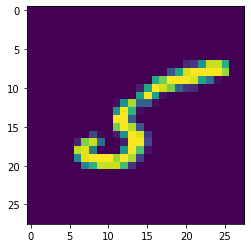

In [7]:
plt.imshow(X_train[11])
#plt.matshow(X_train[11])
plt.show()


In [8]:
y_train[5]

2

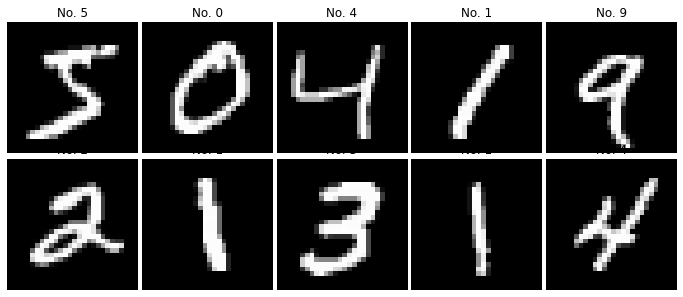

In [9]:
num_rows, num_cols = 2, 5
f, ax = plt.subplots(2, 5, figsize=(12,5),
                     gridspec_kw={'wspace':0.03, 'hspace':0.01}, 
                     squeeze=True)

for r in range(num_rows):
    for c in range(num_cols):
      
        image_index = r * 5 + c
        ax[r,c].axis("off")
        ax[r,c].imshow( X_train[image_index], cmap='gray')
        ax[r,c].set_title('No. %d' % y_train[image_index])
plt.show()
plt.close()

## Data Preprocessing

In [10]:
X_train[5].min()

0

In [11]:
X_train[5].max()

255

In [12]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [13]:
X_train[5].min()

0.0

In [14]:
X_train[5].max()

1.0

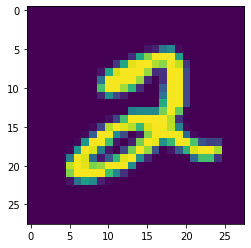

In [15]:
plt.imshow(X_train[5])

In [16]:
X_train = X_train.reshape(X_train.shape[0],28, 28, 1) 
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [17]:
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [18]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [19]:
from tensorflow.keras.utils import to_categorical

In [20]:
Y_train = to_categorical(y_train, 10) 
Y_test = to_categorical(y_test, 10)
Y_test.shape

(10000, 10)

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [22]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=(28, 28, 1), activation='relu',))

model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

**A sample example showing the conversion of 3D data to 2D**
![3Dto2D](https://dphi-courses.s3.ap-south-1.amazonaws.com/Deep+Learning+Bootcamp/3D+to++2D.png)

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               692352    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
_________________________________________________________________


In [24]:
from tensorflow.keras.callbacks import EarlyStopping

In [25]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [26]:
model.fit(X_train, Y_train, batch_size=32, epochs=10, validation_data=(X_test,Y_test),callbacks=[early_stop])


Epoch 1/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.1492 - accuracy: 0.9552 - val_loss: 0.0608 - val_accuracy: 0.9799
Epoch 2/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0515 - accuracy: 0.9844 - val_loss: 0.0445 - val_accuracy: 0.9847
Epoch 3/10
1875/1875 [==============================] - 25s 14ms/step - loss: 0.0325 - accuracy: 0.9902 - val_loss: 0.0456 - val_accuracy: 0.9862
Epoch 4/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0221 - accuracy: 0.9930 - val_loss: 0.0440 - val_accuracy: 0.9841
Epoch 5/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0149 - accuracy: 0.9953 - val_loss: 0.0502 - val_accuracy: 0.9848
Epoch 6/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0121 - accuracy: 0.9959 - val_loss: 0.0535 - val_accuracy: 0.9851


In [27]:
model.metrics_names

['loss', 'accuracy']

In [28]:
model.history.history

{'loss': [0.14922676980495453,
  0.05152900144457817,
  0.032470446079969406,
  0.02211620844900608,
  0.014861787669360638,
  0.012138406746089458],
 'accuracy': [0.9552333354949951,
  0.984416663646698,
  0.9901833534240723,
  0.9930333495140076,
  0.995283305644989,
  0.9959333539009094],
 'val_loss': [0.060812171548604965,
  0.044491007924079895,
  0.04558904841542244,
  0.04403521120548248,
  0.05020515248179436,
  0.053545642644166946],
 'val_accuracy': [0.9799000024795532,
  0.9847000241279602,
  0.9861999750137329,
  0.9840999841690063,
  0.9847999811172485,
  0.9850999712944031]}

In [29]:
summary = pd.DataFrame(model.history.history)
summary.head()

,loss,accuracy,val_loss,val_accuracy
0,0.149227,0.955233,0.060812,0.9799
1,0.051529,0.984417,0.044491,0.9847
2,0.032470,0.990183,0.045589,0.9862
3,0.022116,0.993033,0.044035,0.9841
4,0.014862,0.995283,0.050205,0.9848


Text(0.5, 0, 'Epoch')

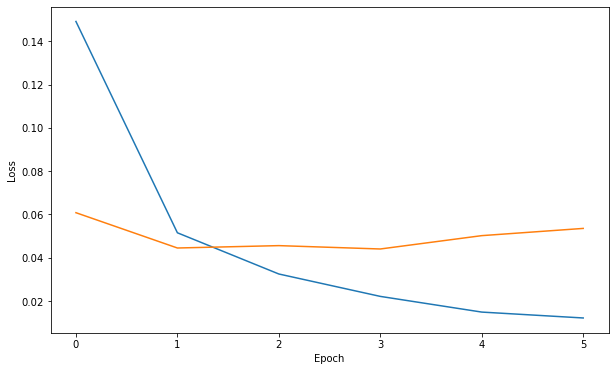

In [30]:
plt.figure(figsize=(10,6))
plt.plot(summary.loss)
plt.plot(summary.val_loss)
plt.ylabel("Loss")
plt.xlabel("Epoch")

Text(0.5, 0, 'Epoch')

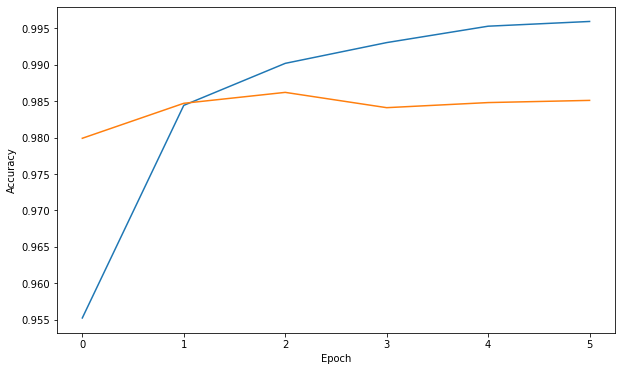

In [31]:
plt.figure(figsize=(10,6))
plt.plot(summary.accuracy)
plt.plot(summary.val_accuracy)
plt.ylabel("Accuracy")
plt.xlabel("Epoch")

In [32]:
print(model.evaluate(X_test,Y_test,verbose=1))

313/313 [==============================] - 1s 3ms/step - loss: 0.0535 - accuracy: 0.9851
[0.053545642644166946, 0.9850999712944031]


In [33]:
from sklearn.metrics import classification_report,confusion_matrix

In [34]:
preds = model.predict(X_test)


In [35]:
predictions= np.argmax(preds, axis=1)

In [36]:
predictions

array([7, 2, 1, ..., 4, 5, 6])

In [37]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.97      0.98      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.98      0.99       982
           5       0.98      0.99      0.99       892
           6       0.99      0.98      0.99       958
           7       0.99      0.98      0.98      1028
           8       0.97      0.99      0.98       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [38]:
print(confusion_matrix(y_test, predictions))

[[ 978    0    0    1    0    0    0    0    1    0]
 [   2 1127    0    2    0    0    2    0    2    0]
 [   4    1 1005    2    1    0    1    9    9    0]
 [   0    0    1  999    0    6    0    1    2    1]
 [   0    0    0    0  963    0    2    0    6   11]
 [   1    0    0    5    0  882    3    0    1    0]
 [   7    2    0    1    3    3  942    0    0    0]
 [   1    3    5    2    0    0    0 1003    3   11]
 [   4    0    0    1    0    2    0    2  963    2]
 [   2    3    0    1    4    3    0    0    7  989]]


In [39]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.053545642644166946
Test accuracy: 0.9850999712944031


In [40]:
my_number = X_test[0]

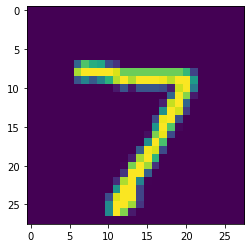

In [41]:
plt.imshow(my_number.reshape(28,28))

In [42]:
model.predict(my_number.reshape(1,28,28,1))

array([[1.5213990e-10, 6.3281718e-09, 1.0810091e-09, 1.3496309e-07,
        9.8025132e-10, 2.0859162e-11, 7.0206199e-16, 9.9999952e-01,
        5.4756960e-10, 3.6734457e-07]], dtype=float32)

In [43]:
# SHAPE --> (num_images,width,height,color_channels)
np.argmax(model.predict(my_number.reshape(1,28,28,1)), axis=1)

array([7])

In [44]:
model.save("cnn-1.h5")